In [1]:
##############################################
# Modeling
##############################################
from keras import layers, models
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from sklearn.model_selection import train_test_split


plt.rcParams['font.family'] = "Malgun Gothic"
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#gpu sync problem
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [59]:
class ANN(models.Model):
    def __init__(self, Nin, Nh,Nh1, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        hidden1=layers.Dense(Nh1)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        h1 = relu(hidden1(h))
        y = output(h1)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')

In [34]:
##############################################
# Data
##############################################
import pandas
 
def csvread(filename='Test A.csv'):
    df = pandas.read_csv(filename) # df is pandas.DataFrame
    return df

# 데이터셋 생성 함수
def seq2dataset(filename = 'Test A.csv'):
    df = csvread('Test A.csv') # df is pandas.DataFrame
    inputdata = df[['Temper','Humidity','Time','Inside abrasives']] 
    return inputdata

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()



def to_integer(dt_time):
    return 1000000*dt_time.month + dt_time.day*10000 + dt_time.hour*100 + dt_time.minute

def Data_func():
    #(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    #scaler = preprocessing.MinMaxScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    dataset = seq2dataset('Test A.csv')
    # 입력(X)과 출력(Y) 변수로 분리하기
    x_train = dataset[['Temper','Humidity','Time']]
    x_train.Time = pd.to_datetime(x_train.Time)
    for i in range(len(x_train)):
        x_train.Time[i] = to_integer(x_train.Time[i])
    y_train = np.array(dataset['Inside abrasives'])
    x_train = np.array(x_train).astype('float64')
    
    scaler = preprocessing.MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    target_data = y_train
    
    plt.plot(y_train,label='y_train')
    plt.show()

    x_train, x_test, y_train, y_test = train_test_split(x_train,target_data,shuffle = False)
    
    plt.plot(y_train,label='after y_train')
    plt.legend()
    plt.show()
    return (x_train, y_train), (x_test, y_test)



In [11]:
##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value

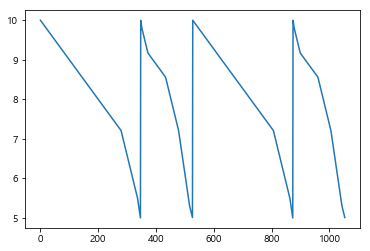

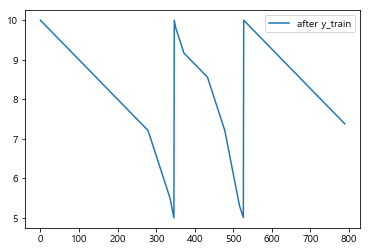

Train on 632 samples, validate on 158 samples
Epoch 1/100
 - 0s - loss: 27.1650 - val_loss: 0.4150
Epoch 2/100
 - 0s - loss: 2.0773 - val_loss: 0.4114
Epoch 3/100
 - 0s - loss: 2.0188 - val_loss: 0.3793
Epoch 4/100
 - 0s - loss: 1.9835 - val_loss: 0.4796
Epoch 5/100
 - 0s - loss: 1.9470 - val_loss: 0.3565
Epoch 6/100
 - 0s - loss: 1.9195 - val_loss: 0.8003
Epoch 7/100
 - 0s - loss: 1.9496 - val_loss: 0.3380
Epoch 8/100
 - 0s - loss: 1.9392 - val_loss: 0.5547
Epoch 9/100
 - 0s - loss: 1.8762 - val_loss: 0.3327
Epoch 10/100
 - 0s - loss: 1.8367 - val_loss: 0.3134
Epoch 11/100
 - 0s - loss: 1.8132 - val_loss: 0.5615
Epoch 12/100
 - 0s - loss: 1.8150 - val_loss: 0.3100
Epoch 13/100
 - 0s - loss: 1.8009 - val_loss: 0.3035
Epoch 14/100
 - 0s - loss: 1.7446 - val_loss: 0.3475
Epoch 15/100
 - 0s - loss: 1.7335 - val_loss: 0.2879
Epoch 16/100
 - 0s - loss: 1.7049 - val_loss: 0.2835
Epoch 17/100
 - 0s - loss: 1.7052 - val_loss: 0.2825
Epoch 18/100
 - 0s - loss: 1.6656 - val_loss: 0.2978
Epoch 19

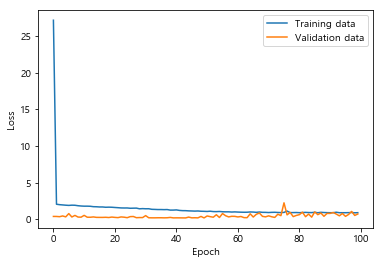

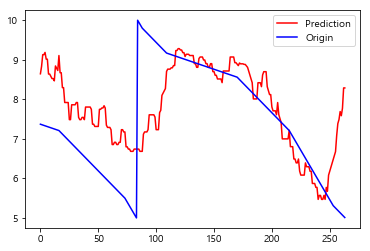

In [60]:
##############################################
# Main
##############################################

def main():
    Nin = 3
    Nh = 16
    Nh1 = 8
    Nout = 1

    model = ANN(Nin, Nh,Nh1, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    plot_loss(history)
    plt.show()
    
    
    xhat = X_test
    yhat = model.predict(xhat)
    
    plt.plot(yhat,'r',label = 'Prediction')
    plt.plot(y_test,'b',label = 'Origin')
    plt.legend()
    plt.show()
    

if __name__ == '__main__':
    main()

Train on 632 samples, validate on 158 samples
Epoch 1/100
 - 0s - loss: 55.2002 - val_loss: 13.4886
Epoch 2/100
 - 0s - loss: 5.1753 - val_loss: 0.3841
Epoch 3/100
 - 0s - loss: 2.0788 - val_loss: 0.4528
Epoch 4/100
 - 0s - loss: 2.0331 - val_loss: 0.7950
Epoch 5/100
 - 0s - loss: 2.0210 - val_loss: 0.3890
Epoch 6/100
 - 0s - loss: 1.9680 - val_loss: 0.3548
Epoch 7/100
 - 0s - loss: 1.9465 - val_loss: 0.5965
Epoch 8/100
 - 0s - loss: 1.9225 - val_loss: 0.4355
Epoch 9/100
 - 0s - loss: 1.9145 - val_loss: 0.3526
Epoch 10/100
 - 0s - loss: 1.9002 - val_loss: 0.4668
Epoch 11/100
 - 0s - loss: 1.9562 - val_loss: 0.3585
Epoch 12/100
 - 0s - loss: 1.8316 - val_loss: 0.3239
Epoch 13/100
 - 0s - loss: 1.8462 - val_loss: 0.5002
Epoch 14/100
 - 0s - loss: 1.8692 - val_loss: 0.3434
Epoch 15/100
 - 0s - loss: 1.7750 - val_loss: 0.3950
Epoch 16/100
 - 0s - loss: 1.7669 - val_loss: 0.4572
Epoch 17/100
 - 0s - loss: 1.7513 - val_loss: 0.2974
Epoch 18/100
 - 0s - loss: 1.7399 - val_loss: 0.3144
Epoch 1

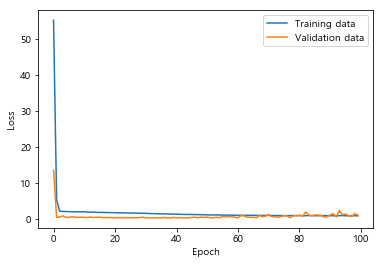

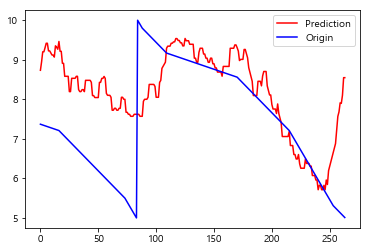

In [63]:
Nin = 3
Nh = 64
Nh1 = 16
Nout = 1

model = ANN(Nin, Nh,Nh1, Nout)
#(X_train, y_train), (X_test, y_test) = Data_func()
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performace_test))

plot_loss(history)
plt.show()
    
    
xhat = X_test
yhat = model.predict(xhat)
    
plt.plot(yhat,'r',label = 'Prediction')
plt.plot(y_test,'b',label = 'Origin')
plt.legend()
plt.show()

(790, 3)


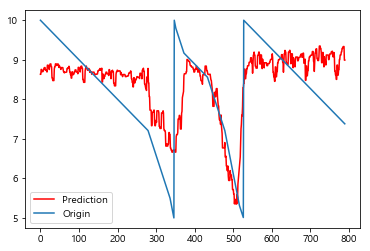

[8.632944  8.632944  8.755902  8.755902  8.698335  8.698335  8.70319
 8.70319   8.7571335 8.7571335 8.802368  8.802368  8.802368  8.73311
 8.73311   8.73311   8.73311   8.690087  8.8635235 8.8635235 8.8635235
 8.806982  8.806982  8.752733  8.856832  8.893741  8.893741  8.896606
 8.824163  8.824163  8.545921  8.545921  8.473763  8.473763  8.473763
 8.473763  8.768533  8.824163  8.824163  8.896606  8.896606  8.893741
 8.856832  8.856832  8.893741  8.893741  8.893741  8.856832  8.805751
 8.858064  8.806982  8.806982  8.806982  8.755902  8.802368  8.802368
 8.802368  8.802368  8.802368  8.744575  8.696763  8.696763  8.669197
 8.683165  8.683165  8.683165  8.683165  8.688943  8.688943  8.777697
 8.777697  8.797693  8.797693  8.797693  8.83589   8.797693  8.6913185
 8.6913185 8.622484  8.622484  8.53596   8.53596   8.695531  8.695531
 8.622484  8.622484  8.641775  8.641775  8.696763  8.696763  8.744575
 8.744575  8.744575  8.688943  8.688943  8.688943  8.688943  8.64579
 8.807373  8.807373  

In [64]:
print(X_train.shape)
yhat = model.predict(X_train).flatten()
plt.plot(yhat,'r',label = 'Prediction')
plt.plot(y_train,label = 'Origin')
plt.legend()
plt.show()

print(yhat)